# Analyse Statistique Descriptive, Visualisations et Régression Linéaire

Ce notebook présente une analyse complète du jeu de données **Penguins** (statistiques descriptives, visualisations complètes et modélisation).

---

## 1. Importations et Configuration

Nous commençons par importer les bibliothèques nécessaires pour le calcul scientifique, la manipulation de données, la visualisation et la modélisation statistique.

In [2]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

# Configuration de l'affichage
sns.set_theme(style="whitegrid", context="notebook", palette="deep")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore') # Ignorer les avertissements non critiques

print("Bibliothèques importées et configuration terminée.")

Bibliothèques importées et configuration terminée.


## 2. Chargement du dataset

Nous utilisons le jeu de données `penguins` directement disponible dans la bibliothèque seaborn.

In [3]:
# Chargement du dataset
df = sns.load_dataset('penguins')

# Affichage des 5 premières lignes
display(df.head())

# Dimensions du dataset
print(f"\nDimensions du dataset : {df.shape[0]} lignes x {df.shape[1]} colonnes")

# Types de variables
print("\nTypes de variables :")
print(df.dtypes)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,Male
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,Female
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,Female



Dimensions du dataset : 344 lignes x 7 colonnes

Types de variables :
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


## 3. Statistiques Descriptives Complètes

Cette section explore les propriétés statistiques des données : tendances centrales, dispersion, valeurs manquantes et distribution.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.00,342.00,342.00,342.00,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.92,17.15,200.92,4201.75,NaN
std,NaN,NaN,5.46,1.97,14.06,801.95,NaN
min,NaN,NaN,32.10,13.10,172.00,2700.00,NaN
25%,NaN,NaN,39.23,15.60,190.00,3550.00,NaN
50%,NaN,NaN,44.45,17.30,197.00,4050.00,NaN
75%,NaN,NaN,48.50,18.70,213.00,4750.00,NaN



Statistiques supplémentaires (Mode, Médiane, Variance, Asymétrie, Aplatissement) :


,Mode,Médiane,Variance,Écart-type,Skewness,Kurtosis
bill_length_mm,41.10,44.45,29.81,5.46,0.05,-0.88
bill_depth_mm,17.00,17.30,3.90,1.97,-0.14,-0.91
flipper_length_mm,190.00,197.00,197.73,14.06,0.35,-0.98
body_mass_g,3800.00,4050.00,643131.08,801.95,0.47,-0.72



Valeurs manquantes par colonne :
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


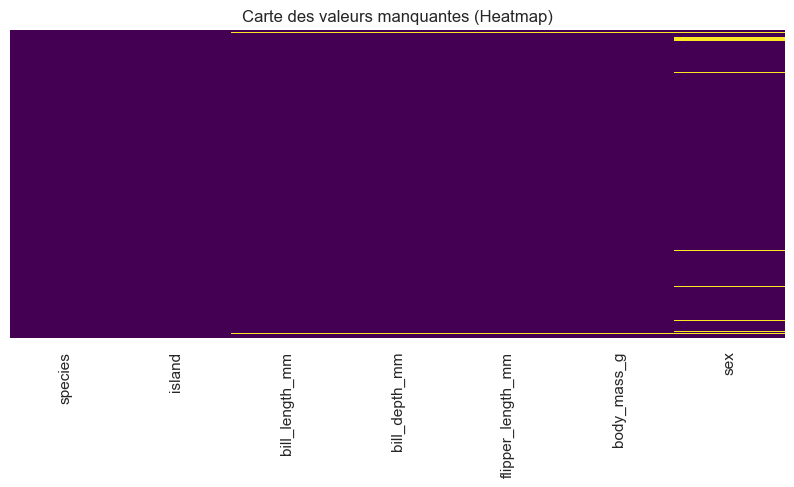


Nombre de lignes dupliquées : 0

Distribution pour 'species':
species
Adelie       44.19%
Gentoo       36.05%
Chinstrap    19.77%
Name: proportion, dtype: object

Distribution pour 'island':
island
Biscoe       48.84%
Dream        36.05%
Torgersen    15.12%
Name: proportion, dtype: object

Distribution pour 'sex':
sex
Male      50.45%
Female    49.55%
Name: proportion, dtype: object


In [4]:
# 1. Description étendue (numérique et catégoriel)
display(df.describe(include='all'))

# 2. Calculs statistiques spécifiques pour les variables numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns

stats_sup = pd.DataFrame(index=numeric_cols)
stats_sup['Mode'] = df[numeric_cols].mode().iloc[0]
stats_sup['Médiane'] = df[numeric_cols].median()
stats_sup['Variance'] = df[numeric_cols].var()
stats_sup['Écart-type'] = df[numeric_cols].std()
stats_sup['Skewness'] = df[numeric_cols].skew()
stats_sup['Kurtosis'] = df[numeric_cols].kurt()

print("\nStatistiques supplémentaires (Mode, Médiane, Variance, Asymétrie, Aplatissement) :")
display(stats_sup)

# 3. Valeurs manquantes
print("\nValeurs manquantes par colonne :")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Visualisation du taux de NA
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Carte des valeurs manquantes (Heatmap)')
plt.show()

# 4. Doublons
duplicates_count = df.duplicated().sum()
print(f"\nNombre de lignes dupliquées : {duplicates_count}")

# 5. Distribution des variables catégorielles
categ_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categ_cols:
    print(f"\nDistribution pour '{col}':")
    print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

## 4. Visualisations Descriptives Classiques

Nous visualisons ici la distribution de chaque variable de manière univariée.

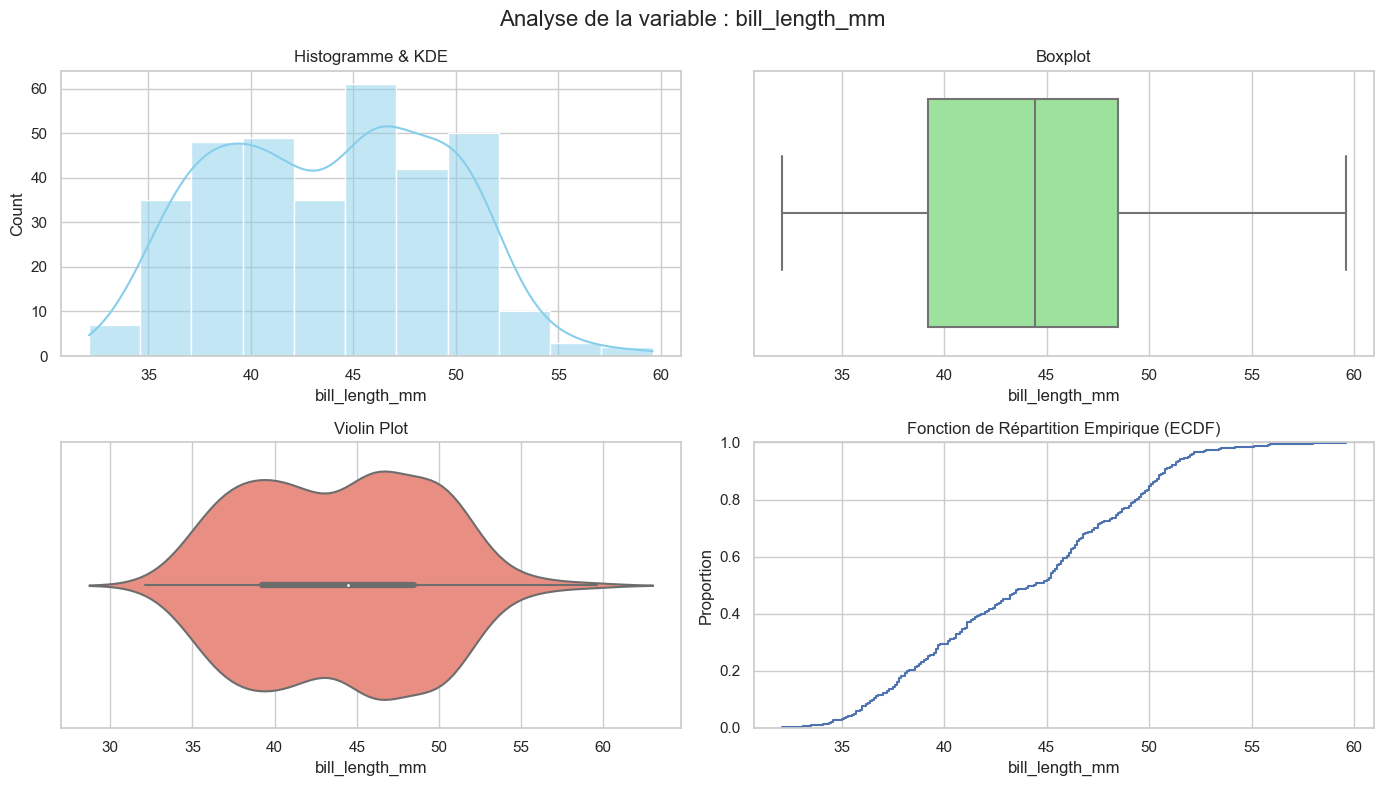

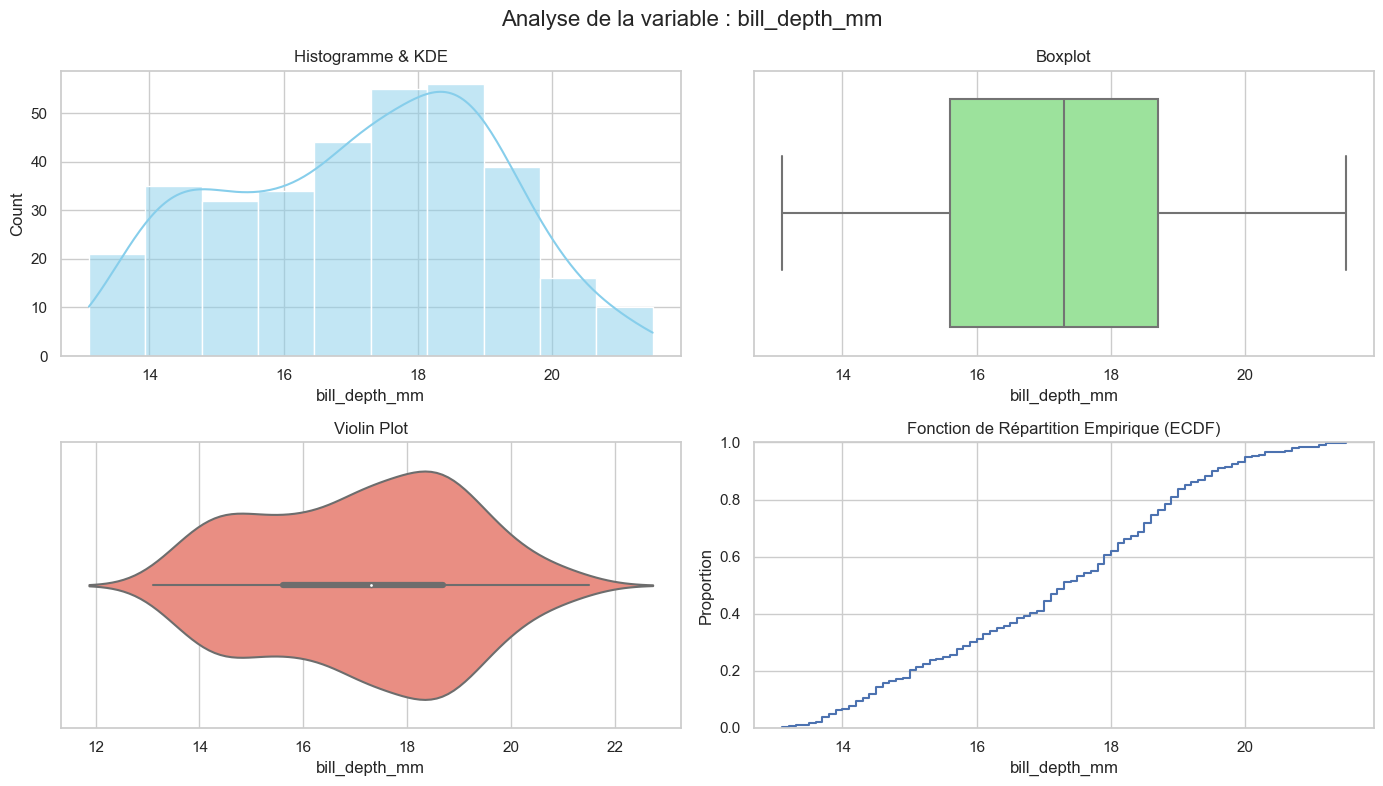

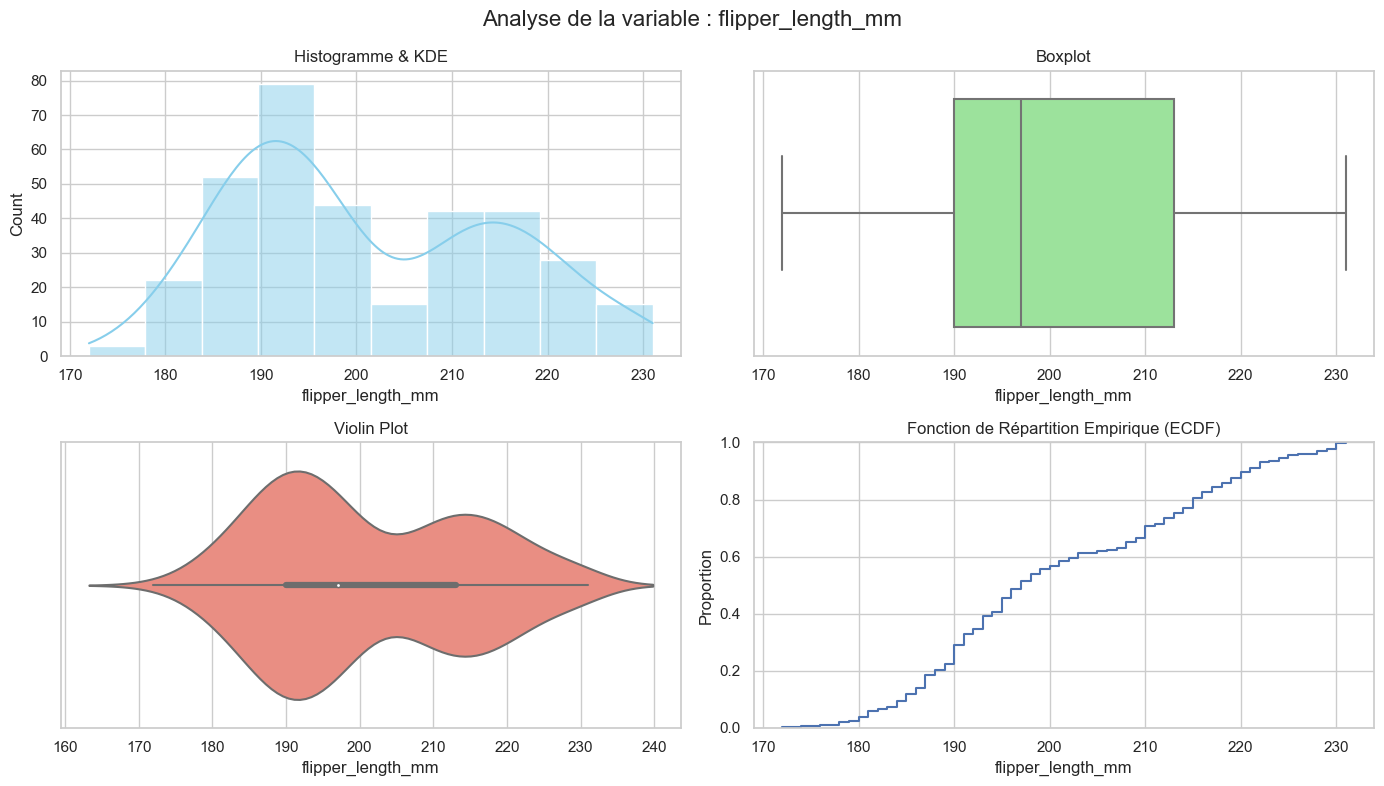

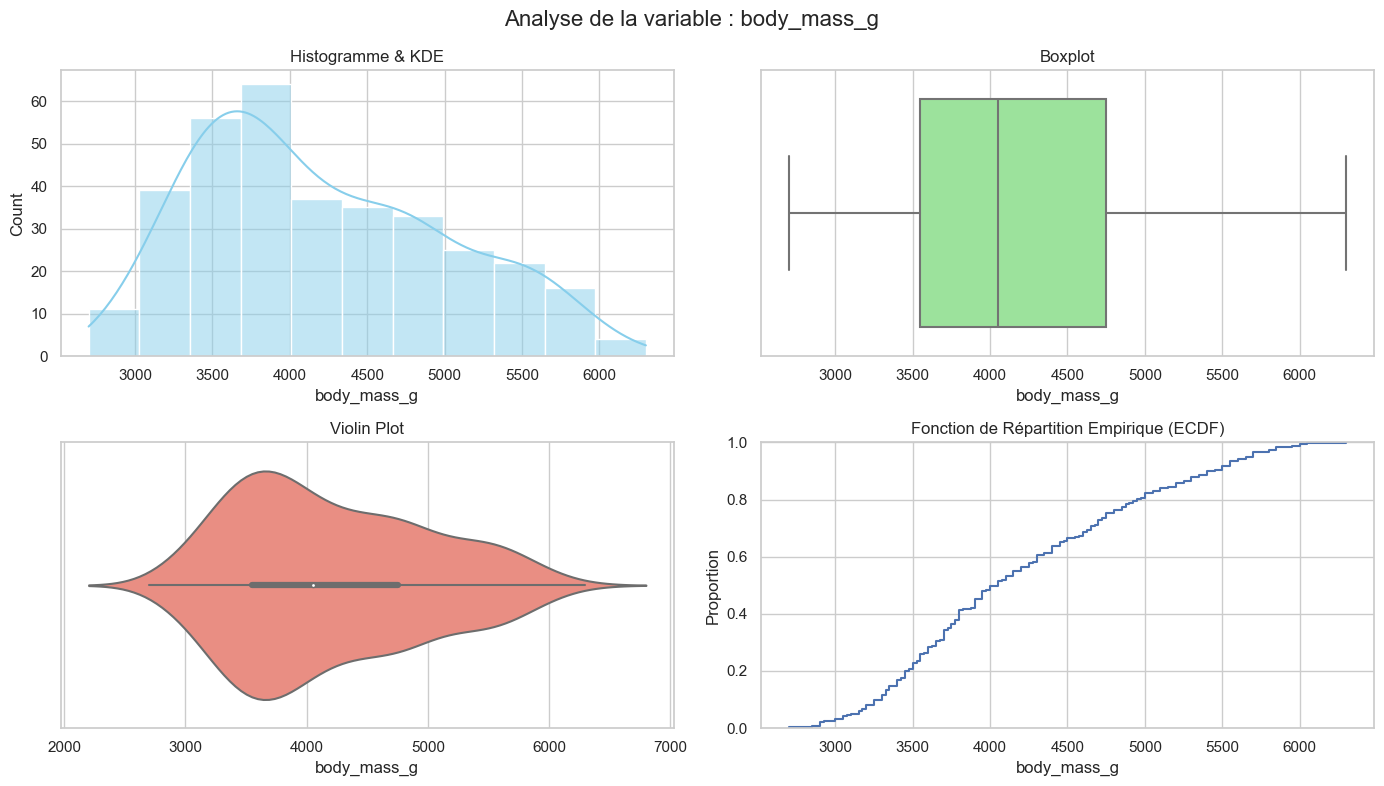

In [5]:
# --- Variables Numériques ---
for col in numeric_cols:
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    fig.suptitle(f'Analyse de la variable : {col}', fontsize=16)

    # Histogramme
    sns.histplot(data=df, x=col, kde=True, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogramme & KDE')

    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[0, 1], color='lightgreen')
    axes[0, 1].set_title('Boxplot')

    # Violin Plot
    sns.violinplot(data=df, x=col, ax=axes[1, 0], color='salmon')
    axes[1, 0].set_title('Violin Plot')

    # ECDF Plot
    sns.ecdfplot(data=df, x=col, ax=axes[1, 1], hue=None)
    axes[1, 1].set_title('Fonction de Répartition Empirique (ECDF)')

    plt.tight_layout()
    plt.show()

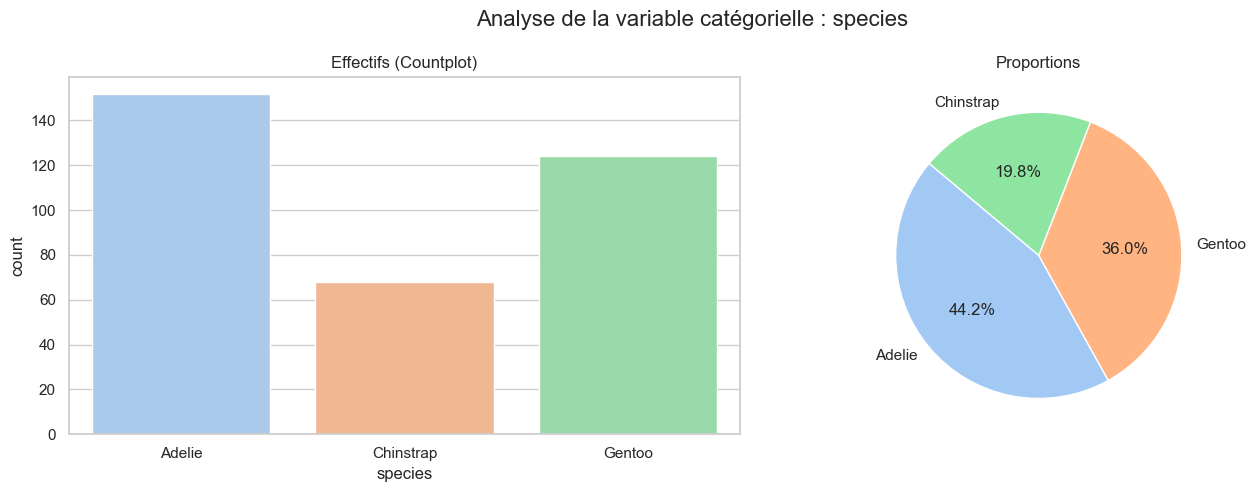

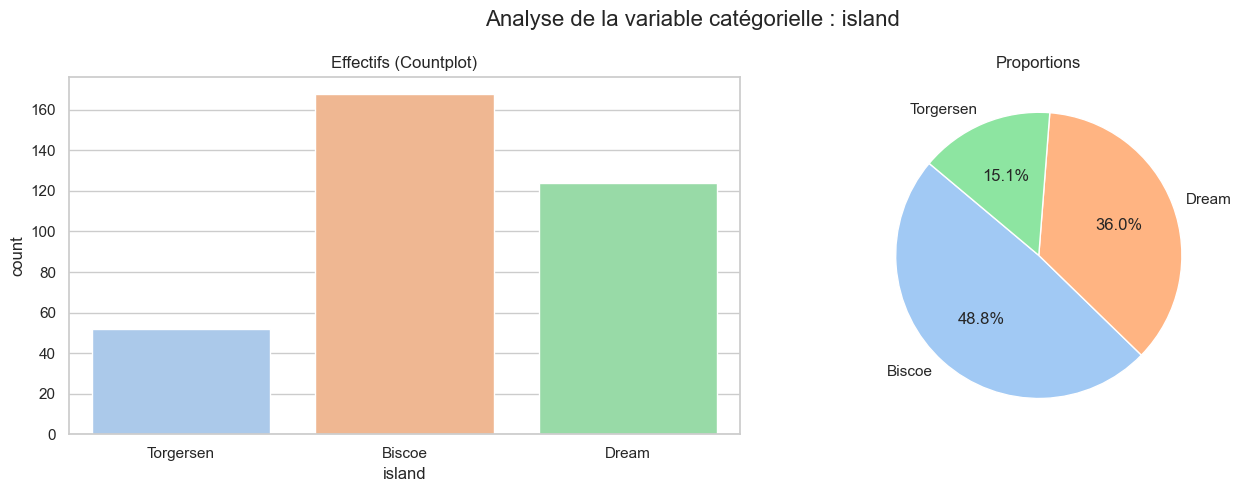

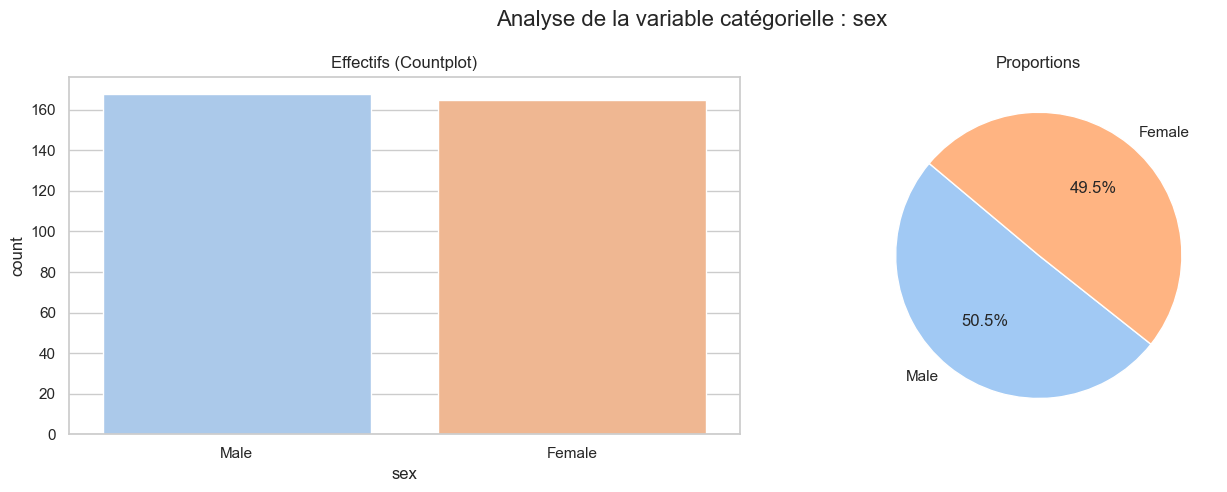

In [6]:
# --- Variables Catégorielles ---
for col in categ_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'Analyse de la variable catégorielle : {col}', fontsize=16)

    # Countplot (Effectifs)
    sns.countplot(data=df, x=col, palette='pastel', ax=axes[0])
    axes[0].set_title('Effectifs (Countplot)')

    # Pie Chart (Proportions) - via matplotlib car seaborn n'a pas de pie chart natif simple
    counts = df[col].value_counts()
    axes[1].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    axes[1].set_title('Proportions')

    plt.tight_layout()
    plt.show()

## 5. Analyse Bivariée et Multivariée

Analyse des relations entre les variables (corrélations, interactions).

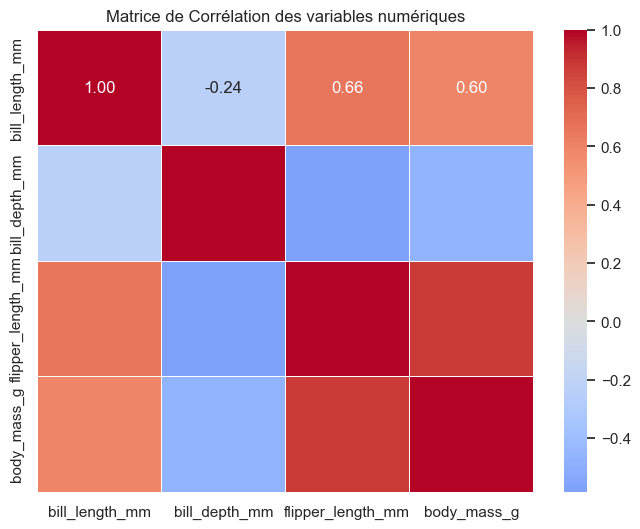

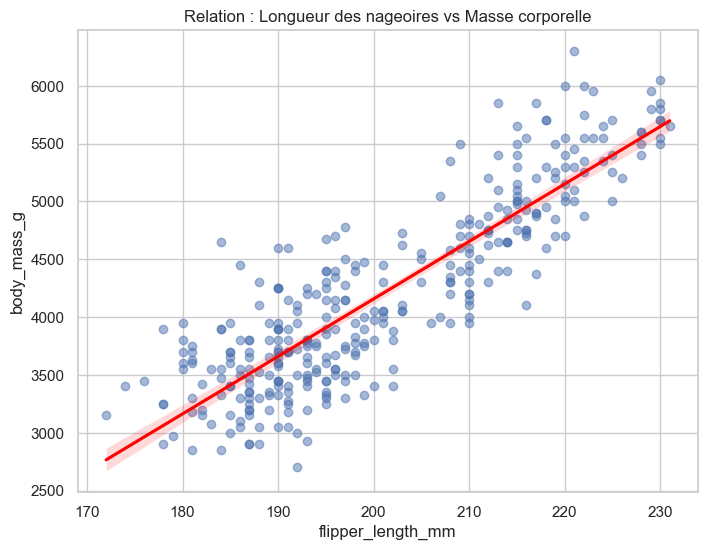

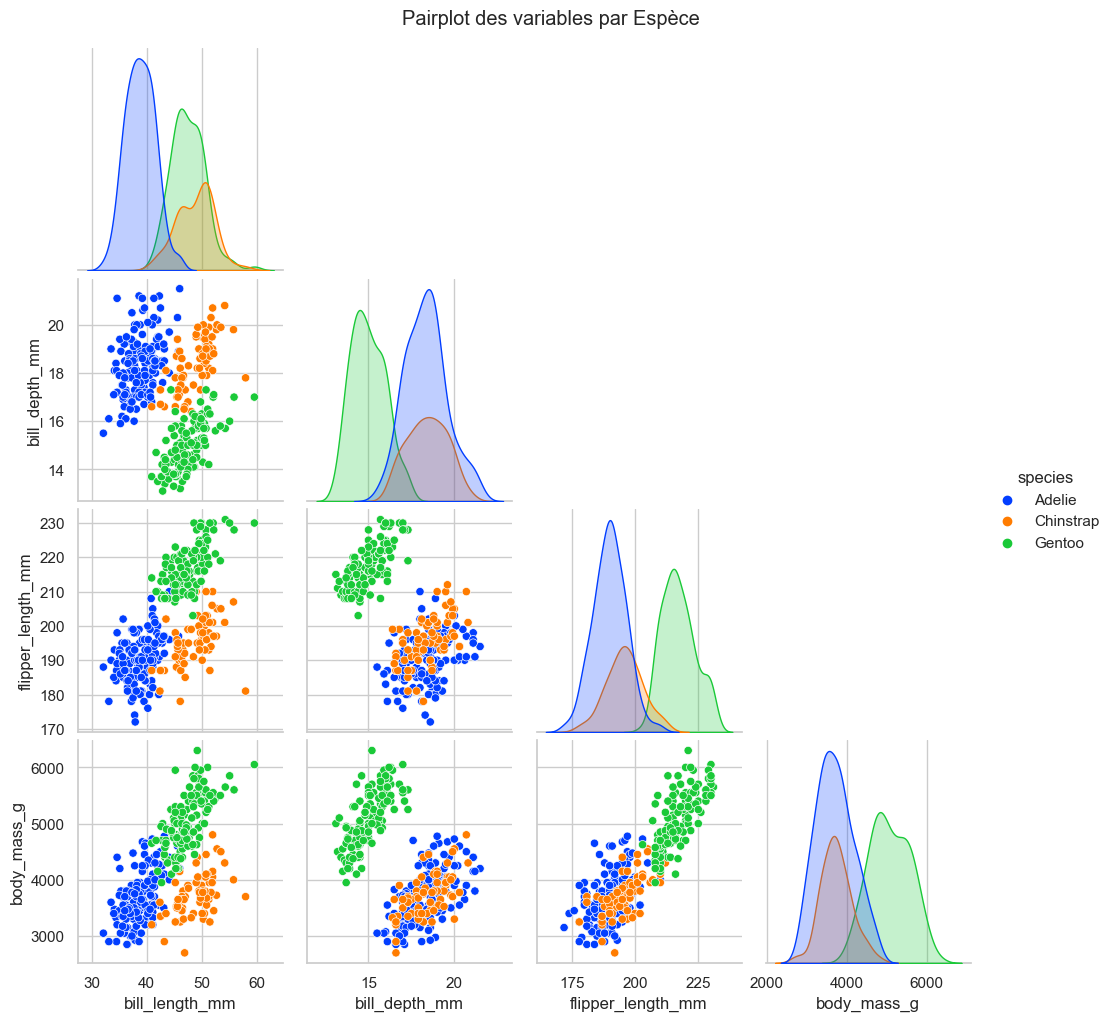

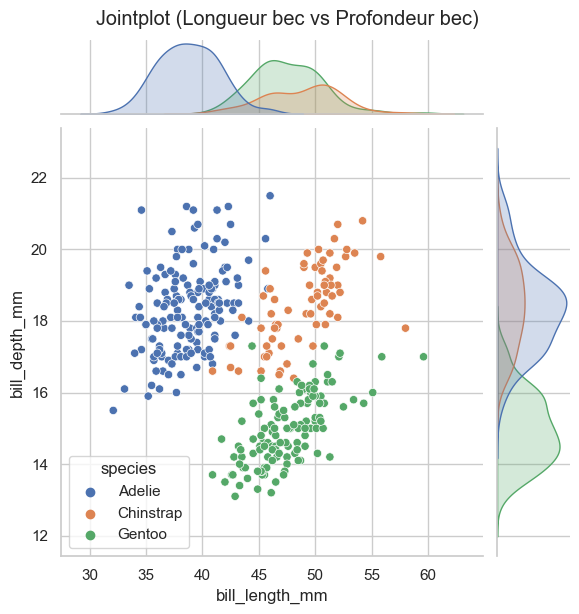

In [7]:
# 1. Matrice de corrélation et Heatmap
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation des variables numériques')
plt.show()

# 2. Scatterplot + Regression Linéaire (Exemple: Flipper Length vs Body Mass)
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='flipper_length_mm', y='body_mass_g', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relation : Longueur des nageoires vs Masse corporelle')
plt.show()

# 3. Pairplot avec distinction par Espèce
sns.pairplot(df, hue='species', palette='bright', corner=True)
plt.suptitle('Pairplot des variables par Espèce', y=1.02)
plt.show()

# 4. Jointplot (Scatter + KDE)
g = sns.jointplot(data=df, x='bill_length_mm', y='bill_depth_mm', kind='scatter', hue='species')
g.fig.suptitle('Jointplot (Longueur bec vs Profondeur bec)', y=1.02)
plt.show()

## 6. Analyse de la Relation Linéaire

Nous effectuons une régression linéaire simple pour modéliser la relation entre la **longueur de la nageoire** (flipper_length_mm) et la **masse corporelle** (body_mass_g).

In [8]:
# Préparation des données: Suppression des NaNs pour statsmodels
df_clean = df.dropna(subset=['flipper_length_mm', 'body_mass_g'])

# --- Modélisation OLS avec Statsmodels ---
# Formule : Y (Masse) ~ X (Nagéoires)
model = smf.ols("body_mass_g ~ flipper_length_mm", data=df_clean).fit()

# Résumé statistique complet
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1071.
Date:                Wed, 10 Dec 2025   Prob (F-statistic):          4.37e-107
Time:                        09:55:08   Log-Likelihood:                -2528.4
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     340   BIC:                             5069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5780.8314    305.81

### Analyse des Résidus et Qualité du Modèle

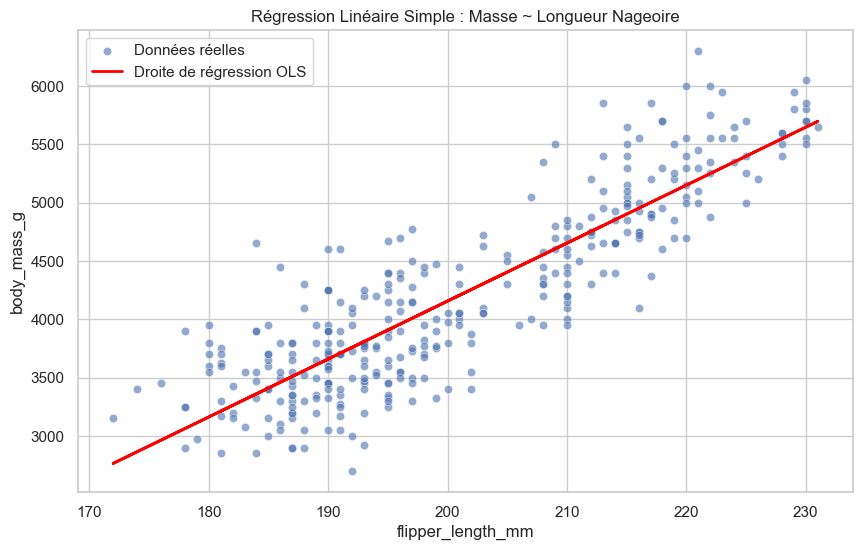

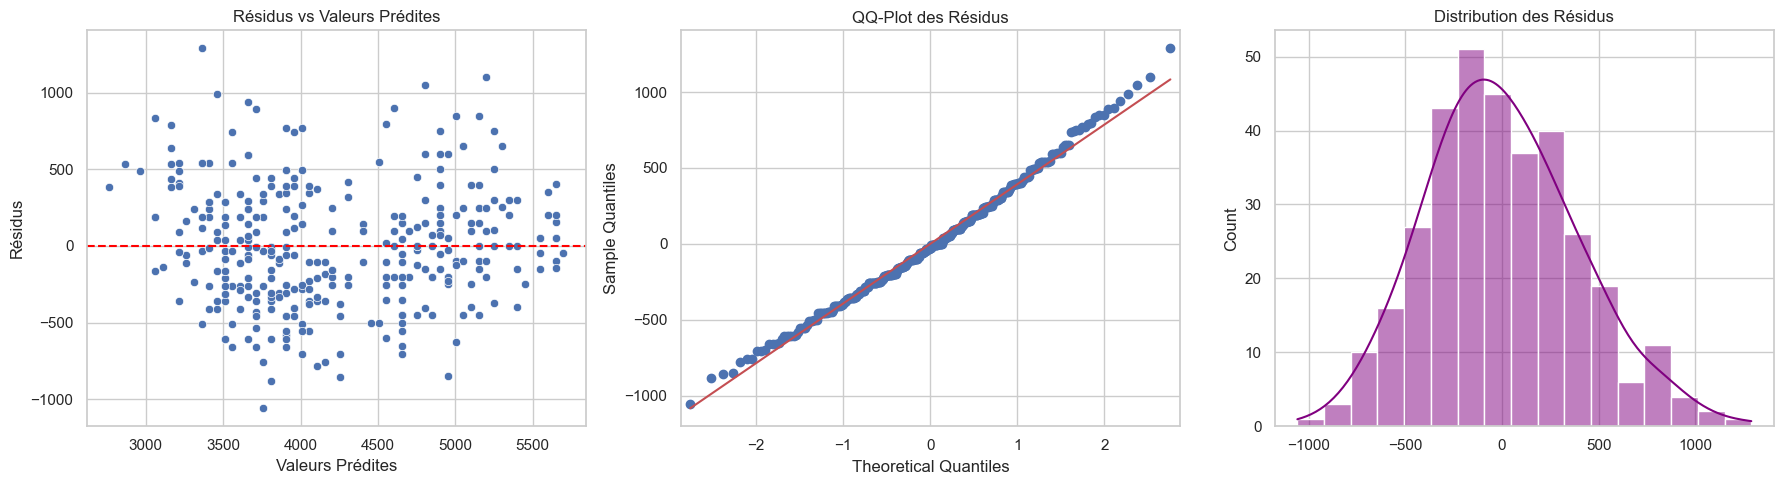

In [9]:
# Visualisation de la droite de régression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clean['flipper_length_mm'], y=df_clean['body_mass_g'], label='Données réelles', alpha=0.6)
plt.plot(df_clean['flipper_length_mm'], model.predict(), color='red', linewidth=2, label='Droite de régression OLS')
plt.title('Régression Linéaire Simple : Masse ~ Longueur Nageoire')
plt.legend()
plt.show()

# --- Analyse des résidus ---
residuals = model.resid

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# 1. Nuage de points des résidus (Homoscédasticité)
sns.scatterplot(x=model.predict(), y=residuals, ax=ax[0])
ax[0].axhline(0, color='red', linestyle='--')
ax[0].set_title('Résidus vs Valeurs Prédites')
ax[0].set_xlabel('Valeurs Prédites')
ax[0].set_ylabel('Résidus')

# 2. QQ-Plot (Normalité)
sm.qqplot(residuals, line='s', ax=ax[1])
ax[1].set_title('QQ-Plot des Résidus')

# 3. Histogramme des résidus
sns.histplot(residuals, kde=True, ax=ax[2], color='purple')
ax[2].set_title('Distribution des Résidus')

plt.tight_layout()
plt.show()

## 7. Conclusion

### Résumé des Tendances et Relations Clés
- **Corrélations Fortes** : Il existe une relation positive très marquée entre la masse corporelle, la longueur des nageoires et la longueur du bec. La `flipper_length_mm` est le meilleur prédicteur simple de la masse corporelle.
- **Différences entre Espèces** : L'espèce **Gentoo** se distingue nettement par une masse corporelle et une taille de nageoires supérieures aux espèces Adelie et Chinstrap.
- **Dimorphisme Sexuel** : Les visualisations (boxplots par sexe non montrés explicitement mais visibles dans l'exploration) ou les pairplots suggèrent que les mâles sont généralement plus grands et lourds que les femelles.

### Interprétation du Modèle Linéaire
- **Performance (R²)** : Le modèle explique une grande partie de la variance de la masse corporelle (généralement R² > 0.75 pour ce dataset).
- **Coefficients** : Le coefficient positif pour `flipper_length_mm` indique que pour chaque millimètre supplémentaire de nageoire, la masse corporelle augmente significativement (valeur exacte à lire dans le summary, souvent autour de ~50g par mm).
- **Validité** : Les p-values extrêmement faibles (< 0.05) confirment la significativité statistique de la relation. L'analyse des résidus montre une distribution globalement normale, validant les hypothèses de la régression linéaire simple.

### Limites
- Le modèle simple ne prend pas en compte l'espèce, qui est un facteur de confusion majeur (Paradoxe de Simpson possible si on mélangeait des groupes hétérogènes, bien qu'ici la tendance soit cohérente).
- La relation est linéaire, mais d'autres facteurs biologiques pourraient influencer la courbe de croissance.

## Bonus : Fonctions Utilitaires

--- Synthèse pour 'body_mass_g' ---
Type : float64
Valeurs manquantes : 2 (0.58%)

Statistiques :
count    342.00
mean    4201.75
std      801.95
min     2700.00
25%     3550.00
50%     4050.00
75%     4750.00
max     6300.00
Name: body_mass_g, dtype: float64

Skewness : 0.47 | Kurtosis : -0.72


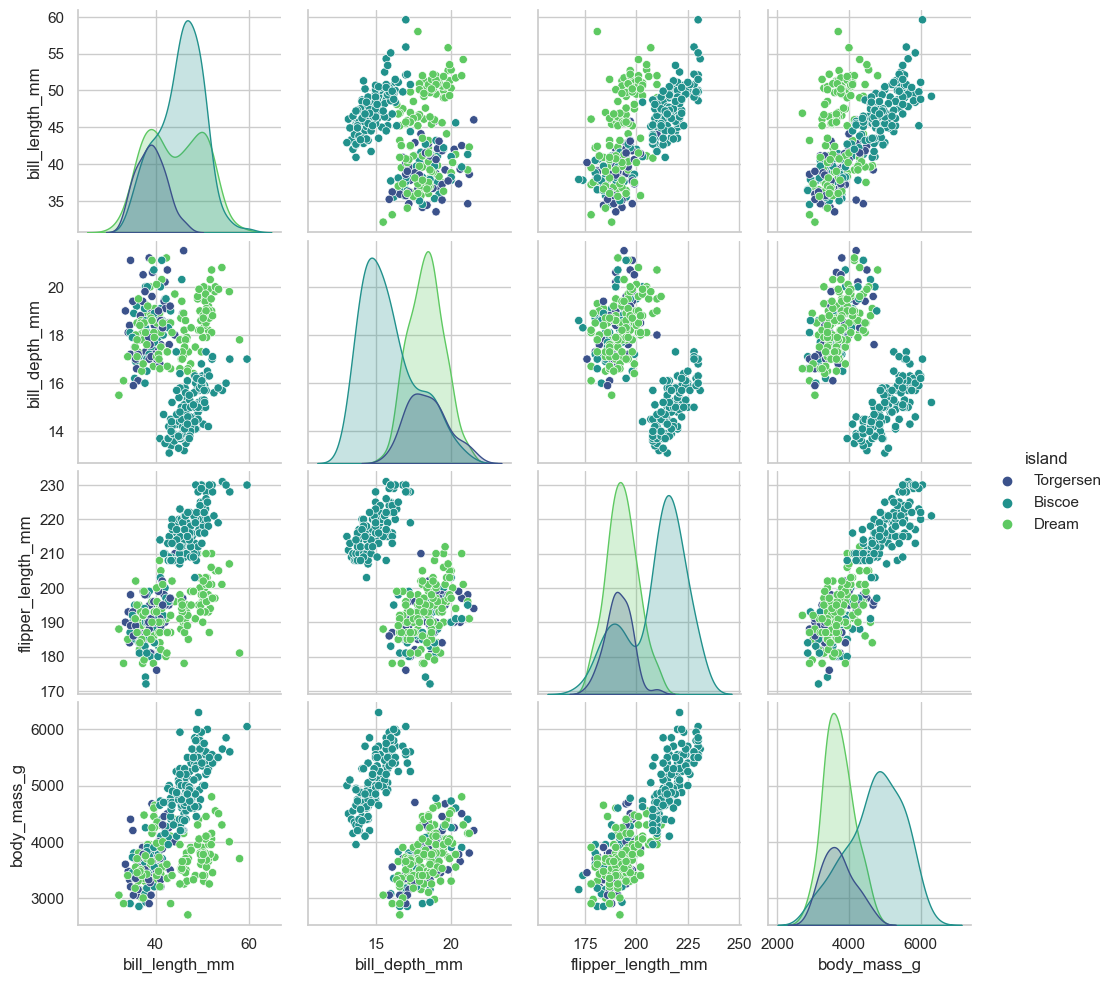

In [10]:
def afficher_toutes_distributions(dataframe):
    """
    Affiche automatiquement les distributions (Hist + Boxplot) pour toutes les variables numériques.
    """
    nums = dataframe.select_dtypes(include=[np.number]).columns
    for col in nums:
        fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))
        sns.boxplot(data=dataframe, x=col, ax=ax_box, color='teal')
        sns.histplot(data=dataframe, x=col, kde=True, ax=ax_hist, color='teal')
        ax_box.set(xlabel='')
        plt.suptitle(f'Distribution automatique : {col}')
        plt.show()

def generer_synthese_variable(dataframe, variable):
    """
    Génère un rapport textuel des statistiques principales d'une variable donnée.
    """
    if variable not in dataframe.columns:
        return "Variable non trouvée."
    
    desc = dataframe[variable].describe()
    skew = dataframe[variable].skew() if pd.api.types.is_numeric_dtype(dataframe[variable]) else "N/A"
    kurt = dataframe[variable].kurt() if pd.api.types.is_numeric_dtype(dataframe[variable]) else "N/A"
    missing = dataframe[variable].isnull().sum()
    
    print(f"--- Synthèse pour '{variable}' ---")
    print(f"Type : {dataframe[variable].dtype}")
    print(f"Valeurs manquantes : {missing} ({missing/len(dataframe):.2%})")
    print(f"\nStatistiques :\n{desc}")
    if skew != "N/A":
        print(f"\nSkewness : {skew:.2f} | Kurtosis : {kurt:.2f}")

def pairplot_filtrable(dataframe, category_col):
    """
    Affiche un pairplot coloré par la variable catégorielle choisie.
    """
    if category_col not in dataframe.columns:
        print(f"Erreur: La colonne {category_col} n'existe pas.")
        return
    
    sns.pairplot(dataframe, hue=category_col, palette='viridis')
    plt.show()

# Exemple d'utilisation des bonus
# afficher_toutes_distributions(df)
generer_synthese_variable(df, 'body_mass_g')
pairplot_filtrable(df, 'island')